In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Exploratory Data Analysis (EDA)

In [3]:
titanic_train = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/XGBM & LGBM/Titanic_train.csv")
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replacing mean value inplace of NaN for age column

In [5]:
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)

In [6]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Describing the Titianic Training set

In [7]:
print(titanic_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Histogram visualization of numerical columns


Generating histograms for numerical features...


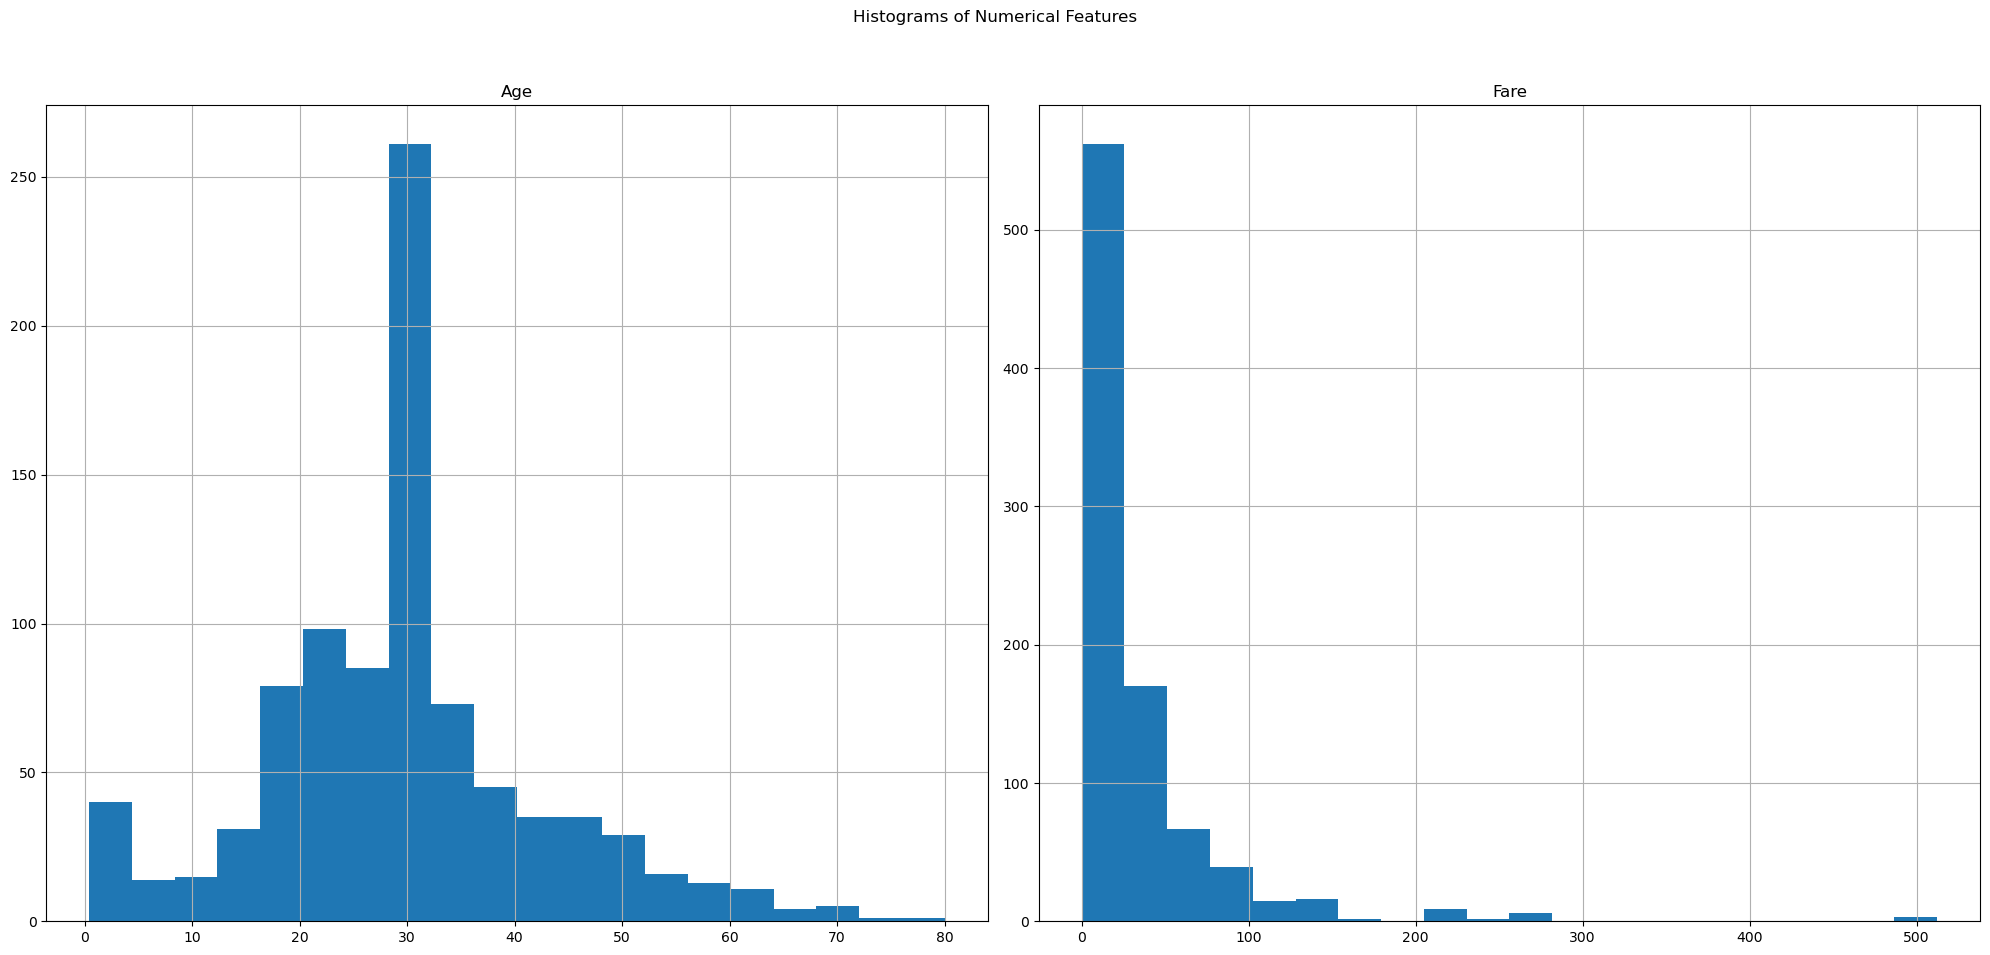

In [8]:
print("\nGenerating histograms for numerical features...")
titanic_train[['Age','Fare']].hist(bins=20, figsize=(20, 10))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Box plot for continues features


Generating box plots for numerical features...


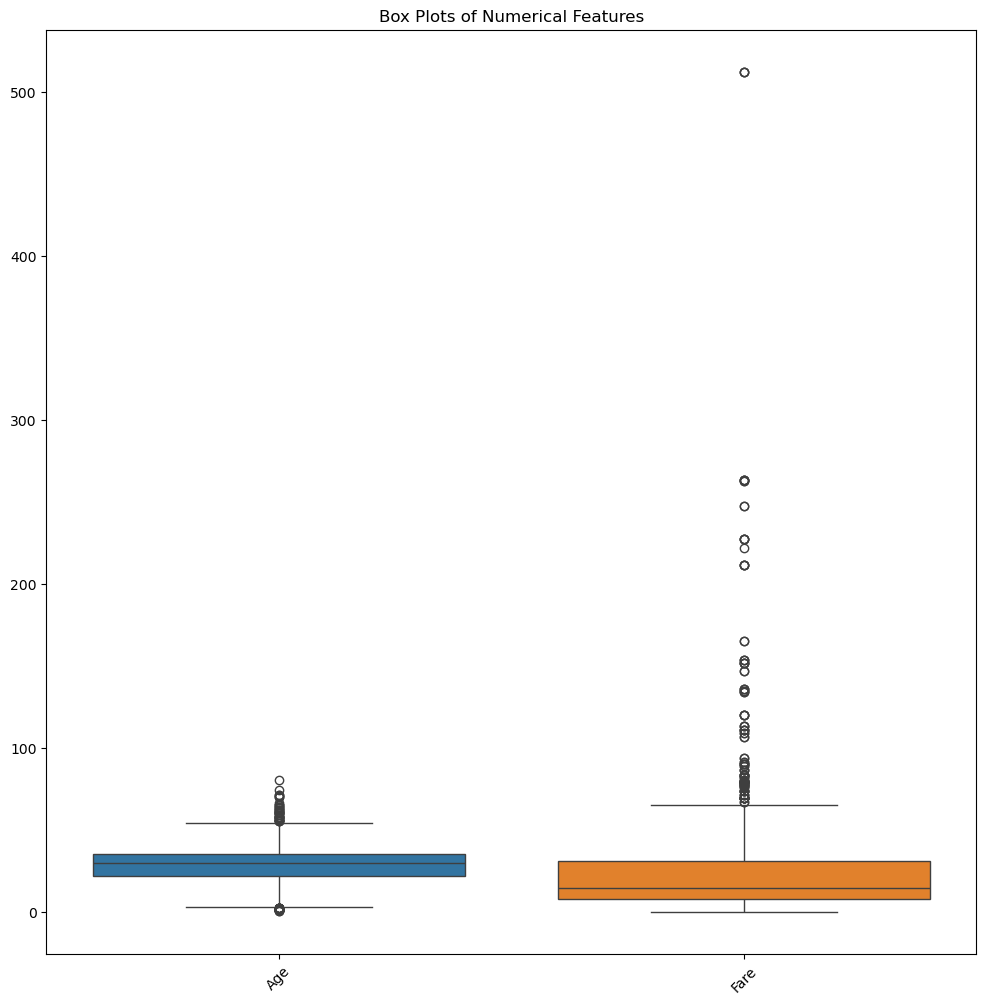

In [9]:
print("\nGenerating box plots for numerical features...")
plt.figure(figsize=(12, 12))
sns.boxplot(data=titanic_train[['Age','Fare']])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

Visualize relationships between features and survival using bar plots for categorical features

In [10]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Visualizing relationships with 'Survived' using bar plots for categorical features...


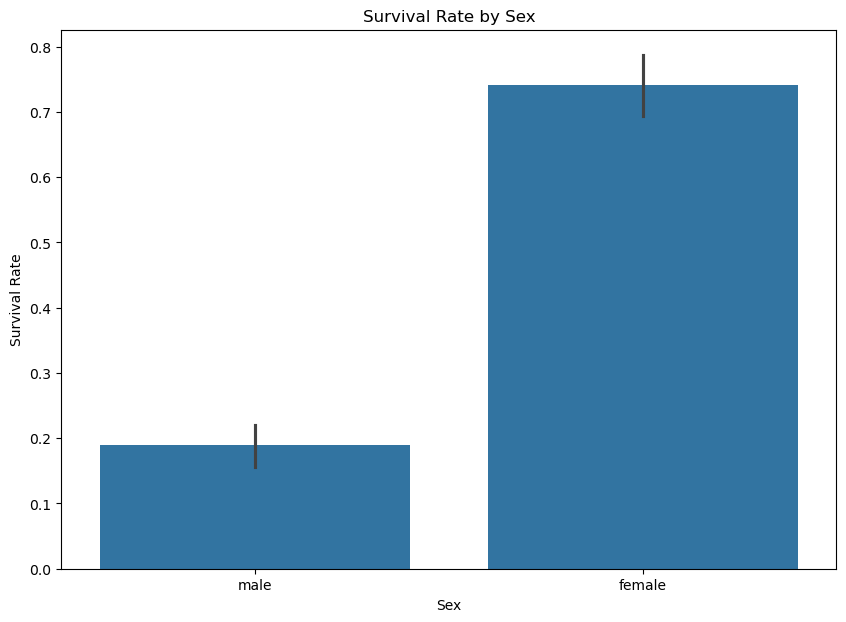

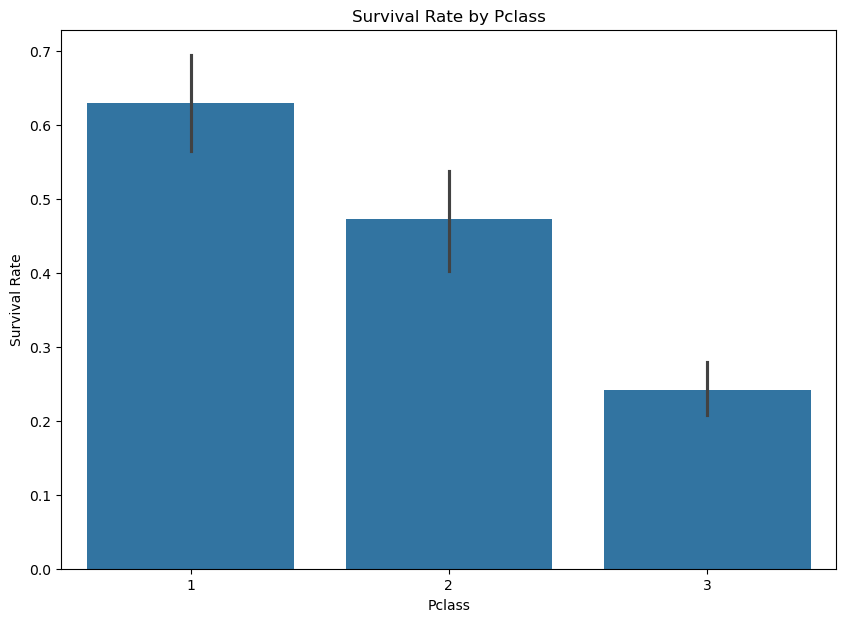

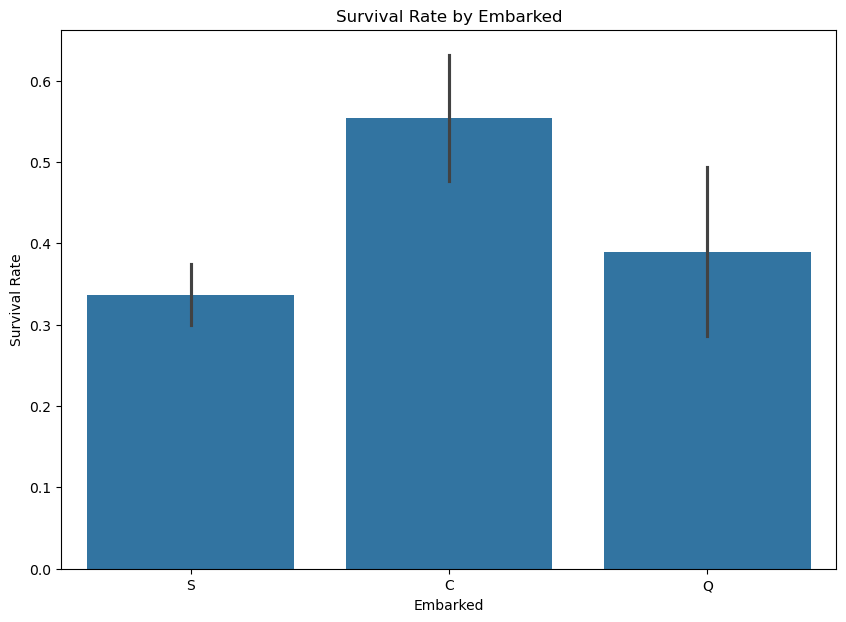

In [11]:
print("\nVisualizing relationships with 'Survived' using bar plots for categorical features...")
categorical_features = ['Sex', 'Pclass', 'Embarked']
for feature in categorical_features:
    if feature in titanic_train.columns:
        plt.figure(figsize=(10, 7))
        sns.barplot(x=feature, y='Survived', data=titanic_train)
        plt.title(f'Survival Rate by {feature}')
        plt.ylabel('Survival Rate')
        plt.show()

Visualize relationships between features and survival using scatter plots for numerical features (e.g., Age vs Survival)
- Note: For 'Survived' (binary), scatter plots are less informative than violin plots or comparing distributions


Visualizing relationships with 'Survived' using violin plot for 'Age'...


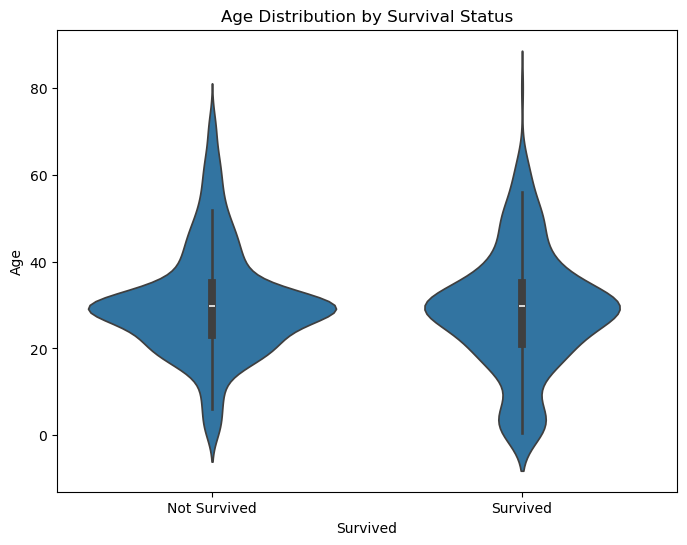

In [12]:
print("\nVisualizing relationships with 'Survived' using violin plot for 'Age'...")
if 'Age' in titanic_train.columns:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Survived', y='Age', data=titanic_train)
    plt.title('Age Distribution by Survival Status')
    plt.xticks([0, 1], ['Not Survived', 'Survived'])
    plt.show()

You can also visualize correlations between numerical features


Generating heatmap of correlations between numerical features...


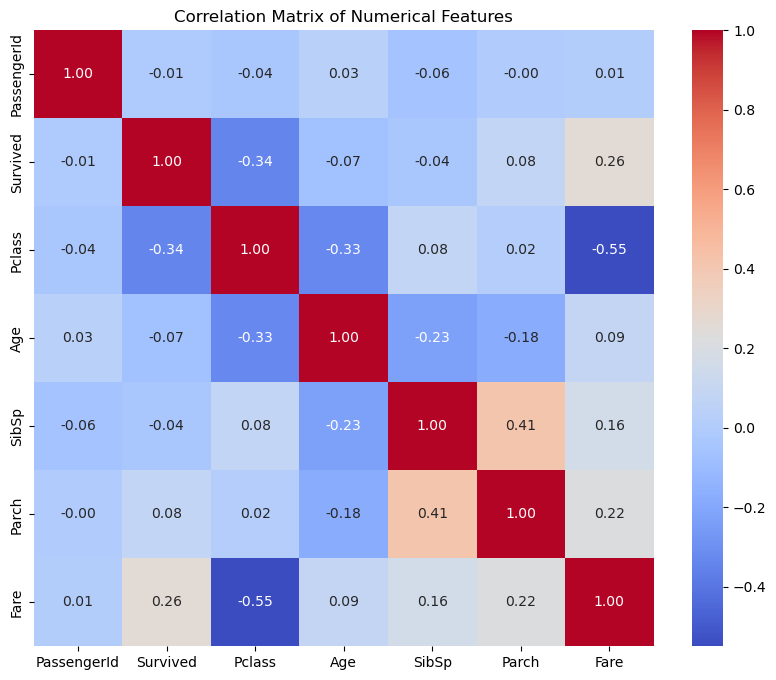

In [13]:
print("\nGenerating heatmap of correlations between numerical features...")
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_train.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Data Preprocessing

Impute 'Embarked' column with the most frequent value (mode)

In [14]:
most_frequent_embarked = titanic_train['Embarked'].mode()[0]
titanic_train['Embarked'].fillna(most_frequent_embarked, inplace=True)

We're deleting Cabin column as it has many missing values

In [15]:
if 'Cabin' in titanic_train.columns:
    print("Dropping 'Cabin' column due to a high number of missing values.")
    titanic_train = titanic_train.drop('Cabin', axis=1)

Dropping 'Cabin' column due to a high number of missing values.


In [16]:
print("\nMissing values after imputation (should be zero for Age and Embarked, Cabin dropped):")
print(titanic_train.isnull().sum())


Missing values after imputation (should be zero for Age and Embarked, Cabin dropped):
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Encode categorical variables

Drop 'Name' and 'Ticket' as they are not directly useful for this basic model

In [17]:
if 'Name' in titanic_train.columns:
    print("Dropping 'Name' column.")
    titanic_train = titanic_train.drop('Name', axis=1)
if 'Ticket' in titanic_train.columns:
    print("Dropping 'Ticket' column.")
    titanic_train = titanic_train.drop('Ticket', axis=1)

Dropping 'Name' column.
Dropping 'Ticket' column.


One-hot encode 'Sex' and 'Embarked'

In [18]:
titanic_train = pd.get_dummies(titanic_train, columns=['Sex', 'Embarked'], drop_first=True)

'Pclass' can be treated as categorical. Let's one-hot encode it too for consistency.

In [19]:
titanic_train = pd.get_dummies(titanic_train, columns=['Pclass'], prefix='Pclass', drop_first=True)

In [20]:
print("\nData after one-hot encoding:")
print(titanic_train.head()) #
print("\nShape of the data after preprocessing:", titanic_train.shape)


Data after one-hot encoding:
   PassengerId  Survived   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0            1         0  22.0      1      0   7.2500         1           0   
1            2         1  38.0      1      0  71.2833         0           0   
2            3         1  26.0      0      0   7.9250         0           0   
3            4         1  35.0      1      0  53.1000         0           0   
4            5         0  35.0      0      0   8.0500         1           0   

   Embarked_S  Pclass_2  Pclass_3  
0           1         0         1  
1           0         0         0  
2           1         0         1  
3           1         0         0  
4           1         0         1  

Shape of the data after preprocessing: (891, 11)


# Building Predictive Models

First, we need to load and preprocess the **test.csv** file in the exact same way we preprocessed the **train.csv**. This is crucial for the models to understand the test data correctly.

In [21]:
titanic_test = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/XGBM & LGBM/Titanic_test.csv")

Save PassengerId for submission if needed (not directly used in model, but useful for competition)

In [22]:
test_passenger_ids = titanic_test['PassengerId']

Impute 'Age' in test_df with the mean of the training 'Age' (important to use training mean for consistency)
We need to re-initialize or use the fitted imputer_age from the training set if this block is run alone.

In [23]:
imputer_age_test = SimpleImputer(strategy='mean')
titanic_test['Age'] = imputer_age_test.fit_transform(titanic_test[['Age']])

In [24]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
imputer_fare_test = SimpleImputer(strategy='mean')
titanic_test['Fare'] = imputer_fare_test.fit_transform(titanic_test[['Fare']])

In [26]:
most_frequent_embarked_test = titanic_test['Embarked'].mode()[0]
titanic_test['Embarked'].fillna(most_frequent_embarked_test, inplace=True)

Drop 'Cabin', 'Name', 'Ticket' from test_df, similar to titanic_train

In [27]:
if 'Cabin' in titanic_test.columns:
    titanic_test = titanic_test.drop('Cabin', axis=1)
if 'Name' in titanic_test.columns:
    titanic_test = titanic_test.drop('Name', axis=1)
if 'Ticket' in titanic_test.columns:
    titanic_test = titanic_test.drop('Ticket', axis=1)

One-hot encode categorical variables in titanic_test, exactly like titanic_train

In [28]:
titanic_test = pd.get_dummies(titanic_test, columns=['Sex', 'Embarked'], drop_first=True) #
titanic_test = pd.get_dummies(titanic_test, columns=['Pclass'], prefix='Pclass', drop_first=True)

In [29]:
print("\nTest data after one-hot encoding:")
print(titanic_test.head())
print("\nShape of the test data after preprocessing:", titanic_test.shape)


Test data after one-hot encoding:
   PassengerId   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0          892  34.5      0      0   7.8292         1           1           0   
1          893  47.0      1      0   7.0000         0           0           1   
2          894  62.0      0      0   9.6875         1           1           0   
3          895  27.0      0      0   8.6625         1           0           1   
4          896  22.0      1      1  12.2875         0           0           1   

   Pclass_2  Pclass_3  
0         0         1  
1         0         1  
2         1         0  
3         0         1  
4         0         1  

Shape of the test data after preprocessing: (418, 10)


In [30]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

In [31]:
train_cols = X.columns

Add missing columns to titanic_test (if any) and ensure order

In [32]:
missing_in_test = set(train_cols) - set(titanic_test.columns)
for c in missing_in_test:
    titanic_test[c] = 0

Drop extra columns from titanic_test (if any)

In [33]:
extra_in_test = set(titanic_test.columns) - set(train_cols)
for c in extra_in_test:
    test_df = titanic_test.drop(c, axis=1)

Ensure the order of columns is the same

In [34]:
titanic_test = titanic_test[train_cols]
X_test = titanic_test.copy()

In [35]:
print("\nFinal X_train and X_test column consistency check:")
print(f"Number of columns in X_train: {X.shape[1]}")
print(f"Number of columns in X_test: {X_test.shape[1]}")
print(f"Are columns in X_train and X_test identical? {list(X.columns) == list(X_test.columns)}")


Final X_train and X_test column consistency check:
Number of columns in X_train: 10
Number of columns in X_test: 10
Are columns in X_train and X_test identical? True


**Build and Train LightGBM Model (on X and y from training file)**

In [36]:
print("\nBuilding and Training LightGBM Model on the full training dataset...")
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X, y)


Building and Training LightGBM Model on the full training dataset...
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 478
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


LGBMClassifier(random_state=42)

Evaluate LightGBM on the actual testing set (X_test)

We don't have 'Survived' in the test.csv, so we can't calculate accuracy, precision, recall, F1 directly. We will predict probabilities or classes for submission.

In [37]:
y_pred_lgbm_test = lgbm_model.predict(X_test)

**Build and Train XGBoost Model (on X and y from training file)**

In [38]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42) # Initialize XGBoost Classifier
xgb_model.fit(X, y)

/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:22:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1724807611129/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Evaluate XGBoost on the actual testing set (X_test)

In [39]:
y_pred_xgb_test = xgb_model.predict(X_test)

**Cross-validation on the Training Data (still useful for robust performance estimation)**

In [40]:
kf = KFold(n_splits=5, shuffle=True, random_state=42) #
lgbm_cv_scores = cross_val_score(lgbm_model, X, y, cv=kf, scoring='accuracy') # Use accuracy as scoring metric
print(f"LightGBM Training Data Cross-Validation Accuracies: {lgbm_cv_scores}")
print(f"LightGBM Training Data Mean CV Accuracy: {lgbm_cv_scores.mean():.4f}")

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 434
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [41]:
print("\nPerforming 5-Fold Cross-Validation for XGBoost on the training data...")
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy') # Use accuracy as scoring metric
print(f"XGBoost Training Data Cross-Validation Accuracies: {xgb_cv_scores}")
print(f"XGBoost Training Data Mean CV Accuracy: {xgb_cv_scores.mean():.4f}")


Performing 5-Fold Cross-Validation for XGBoost on the training data...


/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:22:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1724807611129/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:22:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1724807611129/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:22:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1724807611129/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:22:23] WARN

XGBoost Training Data Cross-Validation Accuracies: [0.7877095  0.79775281 0.82022472 0.7752809  0.81460674]
XGBoost Training Data Mean CV Accuracy: 0.7991


/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [22:22:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1724807611129/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Comparative Analysis

Compare the performance metrics

In [42]:
print(f"LightGBM Mean CV Accuracy: {lgbm_cv_scores.mean():.4f}")
print(f"XGBoost Mean CV Accuracy: {xgb_cv_scores.mean():.4f}")

LightGBM Mean CV Accuracy: 0.8148
XGBoost Mean CV Accuracy: 0.7991


Standard deviation to see consistency

In [43]:
print(f"LightGBM CV Accuracy Standard Deviation: {lgbm_cv_scores.std():.4f}")
print(f"XGBoost CV Accuracy Standard Deviation: {xgb_cv_scores.std():.4f}")

LightGBM CV Accuracy Standard Deviation: 0.0150
XGBoost CV Accuracy Standard Deviation: 0.0166


Create a DataFrame for easier plotting

In [44]:
cv_results = pd.DataFrame({
    'Algorithm': ['LightGBM'] * len(lgbm_cv_scores) + ['XGBoost'] * len(xgb_cv_scores),
    'Accuracy': np.concatenate([lgbm_cv_scores, xgb_cv_scores])
})

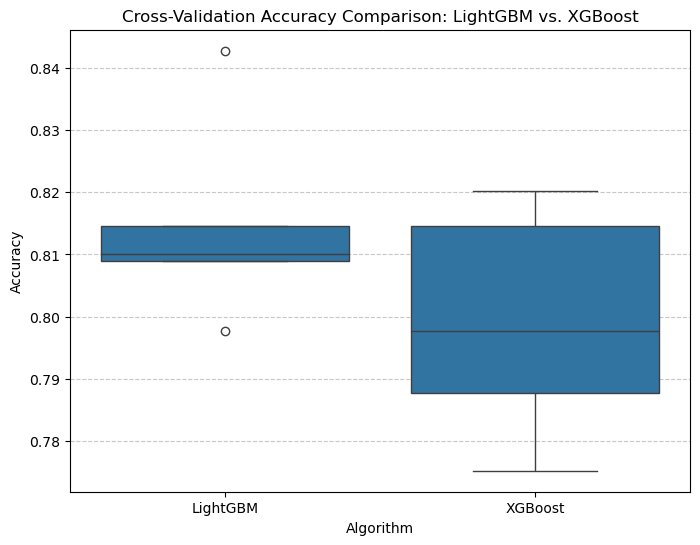

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Algorithm', y='Accuracy', data=cv_results)
plt.title('Cross-Validation Accuracy Comparison: LightGBM vs. XGBoost')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_8419/3961885817.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Algorithm', y='Accuracy', data=cv_results.groupby('Algorithm')['Accuracy'].mean().reset_index(), palette='viridis')


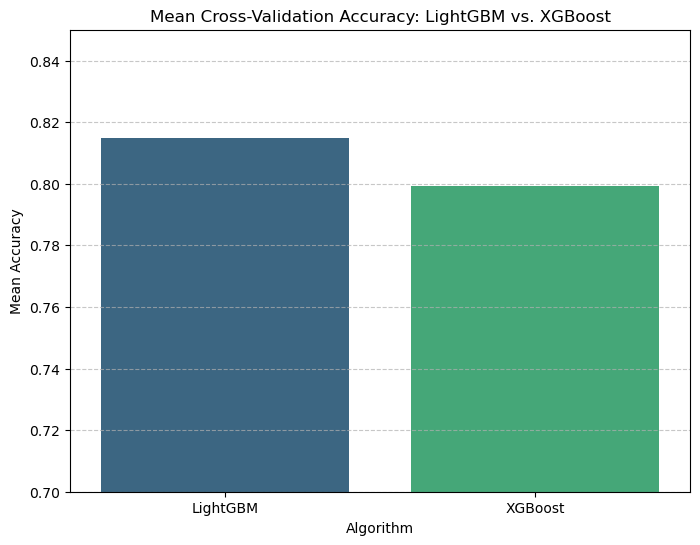

In [46]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=cv_results.groupby('Algorithm')['Accuracy'].mean().reset_index(), palette='viridis')
plt.title('Mean Cross-Validation Accuracy: LightGBM vs. XGBoost')
plt.ylabel('Mean Accuracy')
plt.ylim(0.7, 0.85) # Adjust y-axis to focus on the range of accuracies
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Both LightGBM and XGBoost are powerful gradient boosting algorithms known for their good performance.

In [47]:
if lgbm_cv_scores.mean() > xgb_cv_scores.mean():
    print(f"Based on mean cross-validation accuracy, LightGBM ({lgbm_cv_scores.mean():.4f}) appears to perform slightly better than XGBoost ({xgb_cv_scores.mean():.4f}) on this dataset.")
    print("LightGBM is often faster for training on large datasets and can sometimes achieve comparable or better accuracy due to its leaf-wise tree growth approach.")
else:
    print(f"Based on mean cross-validation accuracy, XGBoost ({xgb_cv_scores.mean():.4f}) appears to perform slightly better than LightGBM ({lgbm_cv_scores.mean():.4f}) on this dataset.")
    print("XGBoost is well-known for its robust performance and handles various data types well. It uses a level-wise tree growth strategy.")

Based on mean cross-validation accuracy, LightGBM (0.8148) appears to perform slightly better than XGBoost (0.7991) on this dataset.
LightGBM is often faster for training on large datasets and can sometimes achieve comparable or better accuracy due to its leaf-wise tree growth approach.


## Strengths and Weaknesses:

- ### LightGBM:
  - **Strengths:** Generally faster training speed, lower memory usage, and good accuracy, especially on large datasets. Its leaf-wise growth can lead to faster convergence.
  - **Weaknesses:** Can be more prone to overfitting on small datasets if not tuned carefully. Requires more careful handling of categorical features (though pandas.get_dummies handles this well).
- ### XGBoost: 
  - **Strengths:** Highly accurate and robust, excellent at handling missing values internally, strong regularization features to prevent overfitting.
  - **Weaknesses:** Can be slower to train than LightGBM, especially on very large datasets, and typically consumes more memory due to its level-wise tree growth.
- ### Practical Implications:
  - For quick iteration and very large datasets, LightGBM might be preferred due to its speed.
  - For maximum accuracy and robustness, especially when computational time is less of a constraint, XGBoost remains a strong choice.
  - Hyperparameter tuning and more advanced feature engineering would likely improve the performance of both models further.

# Submission Requirements

### Titanic Survival Prediction: Comparative Analysis of LightGBM and XGBoost

- **Introduction**
This report compares the performance of LightGBM and XGBoost gradient boosting algorithms on the Titanic dataset. The objective is to predict passenger survival based on various features, evaluate the models, and analyze their strengths and weaknesses. 

- **Data Exploration and Preprocessing**
The Titanic training and test datasets were loaded. Initial Exploratory Data Analysis (EDA) revealed missing values in 'Age', 'Embarked', and 'Cabin' columns. 

  - **Missing Value Imputation:** 'Age' was imputed using the mean, and 'Embarked' using the mode of the training data. The 'Fare' column in the test set was also imputed with its mean. The 'Cabin' column, having a high percentage of missing values, was dropped from both datasets.
  - **Feature Engineering/Selection:** 'Name' and 'Ticket' columns were dropped as they are not directly useful for this type of model.
  - **Categorical Encoding:** Categorical features such as 'Sex', 'Embarked', and 'Pclass' were converted into numerical format using one-hot encoding to make them suitable for machine learning algorithms. 
  - **Column Alignment:**x Special care was taken to ensure that the feature columns in the preprocessed training and test sets were identical in terms of presence and order.
- **Model Building and Evaluation**
Two gradient boosting models, LightGBM and XGBoost, were built.

  - The models were trained on the preprocessed training dataset (titanic_train.csv). 
  - To get a robust estimate of model performance, 5-fold cross-validation was performed on the training data, using accuracy as the primary metric. 
  - Predictions were then generated for the unseen test dataset (titanic_test.csv).
- Comparative Analysis
The performance of LightGBM and XGBoost was compared based on their mean cross-validation accuracies on the training data. 

  - LightGBM Mean CV Accuracy (Training Data): 0.8148
  - XGBoost Mean CV Accuracy (Training Data): 0.7991